In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [18]:
path = r"XXXX-XXXX"
con = sqlite3.connect(path)
cur = con.cursor()
forward = pd.read_sql_query("SELECT *  FROM avgPlayerStatistics AS ps WHERE ps.player_position = 'F' ;", con,)
forward_1 = pd.read_sql_query("SELECT *  FROM playerStatistic AS ps WHERE ps.position = 'F';", con,)
forward_2 = pd.read_sql_query("SELECT *  FROM playerStatistic AS ps WHERE ps.position = 'F'AND ps.total_goals = 2 ;", con,)
forward_3 = pd.read_sql_query("SELECT *  FROM playerStatistic AS ps WHERE ps.position = 'F' AND ps.total_goals = 3 ;", con,)
print(len(forward.columns))

35


In [15]:
pd.set_option('display.max_columns', None)
forward.describe()
#forward["conceded"].describe()
# forward["assists"].describe()
# forward.dtypes

,index,assists,blocks,commited_fouls,commited_penalty,conceded,drawn_fouls,dribble_attempts,dribble_past,dribble_success,fixture_id,interceptions,key_passes,minutes,missed_penalty,number,offside,on_goal_shots,pass_accuracy,player_id,rating,red,saved_penalty,saves,scored_penalty,timestamp,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
count,56779.000000,56779.000000,56779.000000,56779.0,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.0,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.0,56779.000000,56779.000000,5.677900e+04,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000,56779.000000
mean,24114.540622,0.113383,0.031008,0.0,0.002512,0.000042,1.247108,1.830262,0.533284,0.966691,178230.073689,0.336138,0.976111,67.521735,0.008591,18.400254,0.0,0.787911,62.352216,22798.401346,4.198578,0.004872,0.0,0.000092,0.032051,1.533148e+09,8.823129,0.286752,15.934865,1.867605,0.353067,3.803289,0.026067,0.111907
std,14412.723605,0.173645,0.093309,0.0,0.024899,0.005935,0.844730,1.498467,0.476713,0.925986,208017.515662,0.392168,0.745498,20.691611,0.043898,16.472752,0.0,0.573754,23.042104,25357.312367,3.425897,0.033349,0.0,0.013099,0.094046,5.490805e+07,5.283630,0.303517,9.043132,1.113225,0.499451,2.520789,0.076748,0.158962
min,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.438972e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11778.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.600000,0.800000,0.200000,0.400000,16975.000000,0.000000,0.400000,54.800000,0.000000,9.000000,0.0,0.400000,58.200000,1707.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.486219e+09,5.400000,0.000000,9.600000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,23164.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.400000,0.400000,0.800000,150630.000000,0.200000,0.800000,73.200000,0.000000,12.600000,0.0,0.666667,70.000000,20674.000000,6.620000,0.000000,0.0,0.000000,0.000000,1.535891e+09,8.800000,0.200000,14.200000,1.800000,0.200000,3.600000,0.000000,0.000000
75%,36545.000000,0.200000,0.000000,0.0,0.000000,0.000000,1.800000,2.600000,0.800000,1.400000,212146.000000,0.400000,1.400000,85.200000,0.000000,21.000000,0.0,1.000000,77.600000,37027.000000,7.000000,0.000000,0.0,0.000000,0.000000,1.579721e+09,12.200000,0.400000,20.200000,2.600000,0.600000,5.400000,0.000000,0.200000
max,49983.000000,2.000000,1.800000,0.0,1.000000,1.000000,7.000000,15.000000,7.000000,9.400000,705683.000000,7.000000,7.000000,96.000000,1.000000,99.000000,0.0,4.750000,100.000000,308839.000000,9.380000,1.000000,0.0,2.250000,1.000000,1.622398e+09,36.000000,3.000000,83.000000,10.000000,6.000000,22.000000,1.000000,2.000000


Identifikations daten können entfernt werden. <br>
Werte die einen Durchschnitt von 0 haben sind wertlose informationen

In [19]:
def drop_columns(df):
    df.drop(columns='fixture_id', inplace=True)
    df.drop(columns='index', inplace=True)
    df.drop(columns='timestamp', inplace=True)
    df.drop(columns='player_id', inplace=True)
    df.drop(columns='number', inplace=True)
    #drop mit mean 0 
    df.drop(columns='saves', inplace=True)
    df.drop(columns='offside', inplace=True)
    df.drop(columns='conceded', inplace=True)
    df.drop(columns='commited_fouls', inplace=True)
    df.drop(columns='saved_penalty', inplace=True)
    df.drop(columns='rating', inplace=True)

drop_columns(forward)
print(len(forward.columns))
#drop_columns(forward_1)
# drop_columns(forward_2)
# drop_columns(forward_3)

24


In [20]:
pd.set_option('display.max_columns', None)
#forward.drop(columns='player_position', inplace=True)
ha = forward.loc[~(forward==0.0).all(axis=1)]
forward.dtypes
display(ha)

,assists,blocks,commited_penalty,drawn_fouls,dribble_attempts,dribble_past,dribble_success,interceptions,key_passes,minutes,missed_penalty,on_goal_shots,pass_accuracy,player_position,red,scored_penalty,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
0,0.0,0.0,0.0,1.0,0.0,0.000000,0.00,0.000000,0.00,61.00,0.0,1.000000,83.00,F,0.0,0.0,4.000000,0.000000,10.000000,2.00,1.000000,2.0,0.0,0.000000
1,0.0,0.0,0.0,1.0,2.0,1.000000,1.00,0.000000,0.00,45.00,0.0,0.000000,64.00,F,0.0,0.0,8.000000,0.000000,16.000000,1.00,1.000000,3.0,0.0,0.000000
2,0.0,0.0,0.0,1.0,7.0,0.000000,3.00,1.000000,1.00,89.00,0.0,1.000000,57.00,F,0.0,0.0,21.000000,1.000000,15.000000,2.00,2.000000,11.0,0.0,0.000000
3,0.0,1.0,0.0,4.0,2.0,3.000000,2.00,0.000000,0.00,90.00,0.0,2.000000,86.00,F,0.0,0.0,12.000000,0.000000,26.000000,3.00,0.000000,6.0,0.0,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.000000,1.00,0.000000,2.00,90.00,0.0,0.000000,82.00,F,0.0,0.0,7.000000,0.000000,29.000000,2.00,1.000000,3.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56774,0.0,0.0,0.0,0.5,0.5,0.250000,0.25,0.000000,0.25,19.25,0.0,0.000000,38.75,F,0.0,0.0,3.750000,0.000000,2.000000,0.25,0.250000,2.0,0.0,0.000000
56775,0.0,0.0,0.0,0.2,0.8,0.200000,0.00,0.000000,0.00,37.60,0.0,0.400000,3.60,F,0.0,0.0,4.400000,0.000000,4.200000,1.60,0.000000,1.0,0.0,0.200000
56776,0.2,0.0,0.0,2.6,2.2,0.600000,1.20,0.600000,0.40,48.00,0.0,0.000000,38.80,F,0.0,0.0,10.400000,0.000000,8.400000,0.60,0.200000,5.6,0.2,0.000000
56777,0.0,0.0,0.0,1.0,1.0,0.666667,0.00,0.666667,0.00,44.00,0.0,0.333333,50.00,F,0.0,0.0,8.666667,0.333333,8.666667,1.00,0.333333,3.0,0.0,0.666667


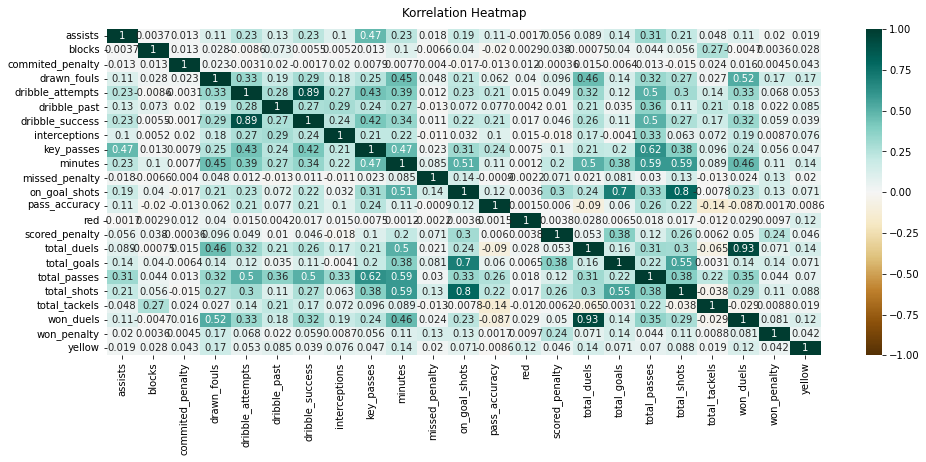

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(forward.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korrelation Heatmap', fontdict={'fontsize':12}, pad=12);

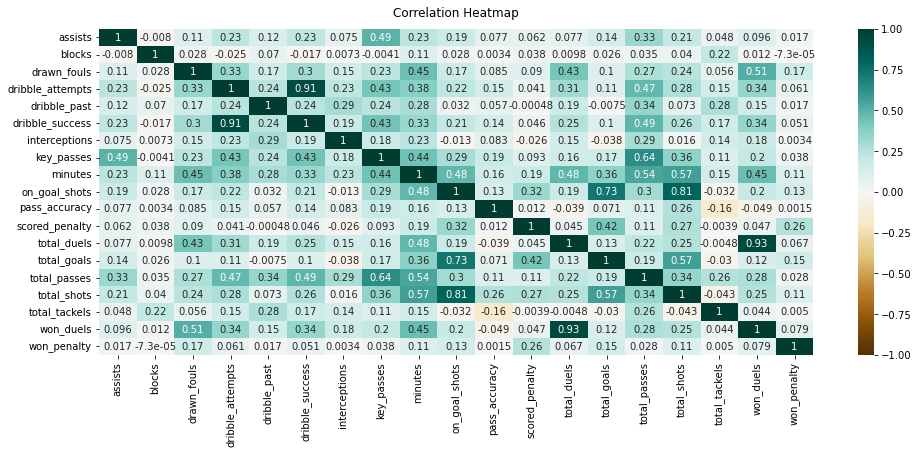

In [23]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(forward.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

yello, red, missed penalty, commited penalty, block haben mit den anderen werten keinen zusammenhang und können raus

In [22]:
def drop_columns_withour_corr(df):
    df.drop(columns='yellow', inplace=True)
    df.drop(columns='red', inplace=True)
    df.drop(columns='missed_penalty', inplace=True)
    df.drop(columns='commited_penalty', inplace=True)
    

drop_columns_withour_corr(forward)

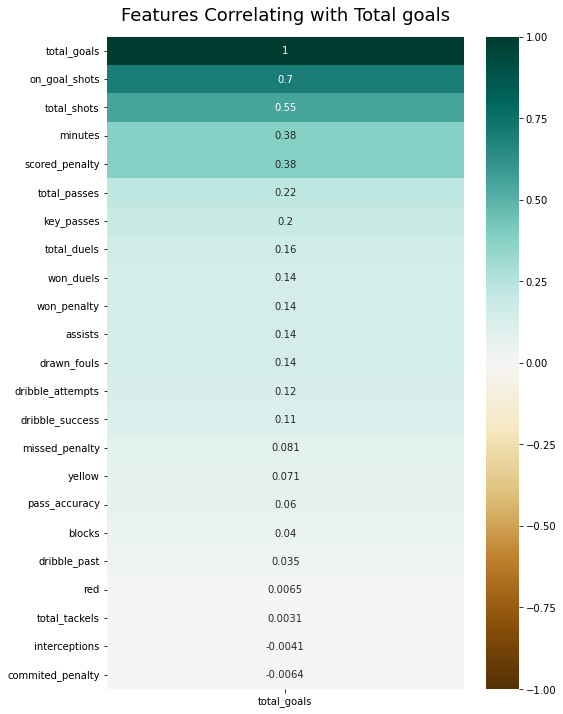

In [125]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['total_goals']].sort_values(by='total_goals', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total goals', fontdict={'fontsize':18}, pad=16);

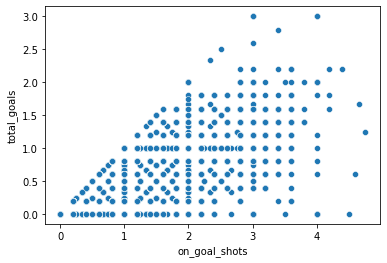

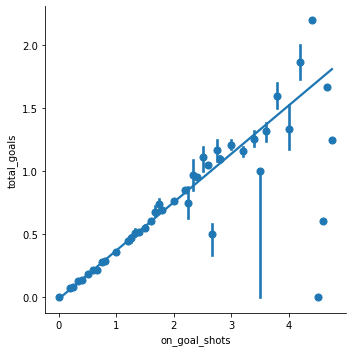

In [6]:
sns.scatterplot(x="on_goal_shots", y="total_goals", data=forward, x_jitter=1, y_jitter=1)
sns.lmplot(x="on_goal_shots", y="total_goals", data=forward, x_estimator=np.mean,  x_ci=50, ci=20); #was ist x_ci und was ci

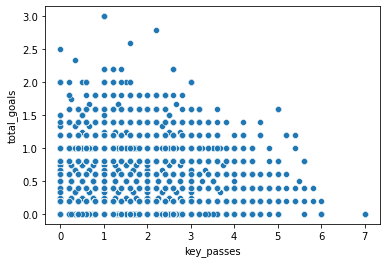

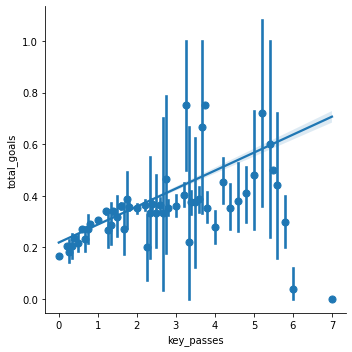

In [78]:
sns.scatterplot(x="key_passes", y="total_goals", data=forward)
sns.lmplot(x="key_passes", y="total_goals", data=forward, x_estimator=np.mean);

Je mehr totalshots geschossen werden, desto mehr Tore werden geschossen. Warum? Der Bereich zwischen erstem quantil und zweiten quantil geht immer weiter hoch

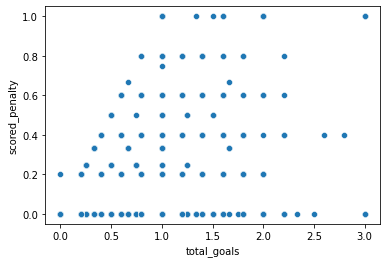

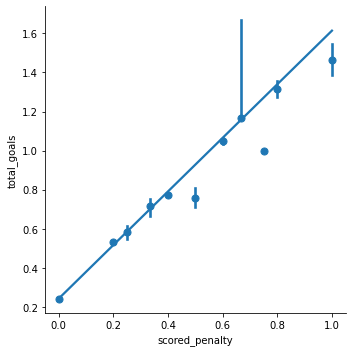

In [46]:
sns.scatterplot(x="total_goals", y="scored_penalty", data=forward)
sns.lmplot(x="scored_penalty", y="total_goals", data=forward, x_estimator=np.mean, x_ci=50, ci=20);

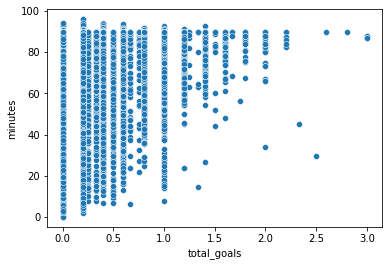

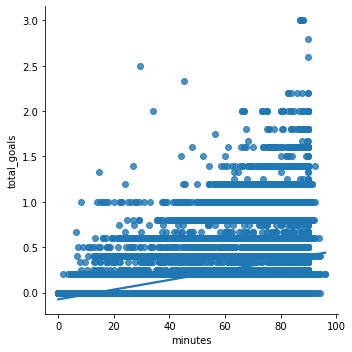

In [42]:
sns.scatterplot(x="total_goals", y="minutes", data=forward)
sns.lmplot(x="minutes", y="total_goals", data=forward);

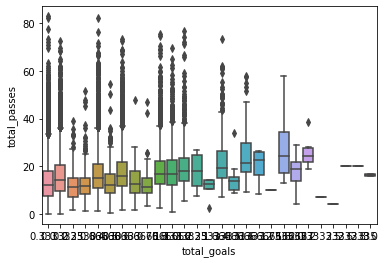

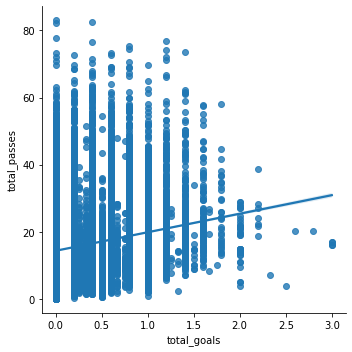

In [32]:
sns.boxplot(x="total_goals", y="total_passes", data=forward)
sns.lmplot(x="total_goals", y="total_passes", data=forward);

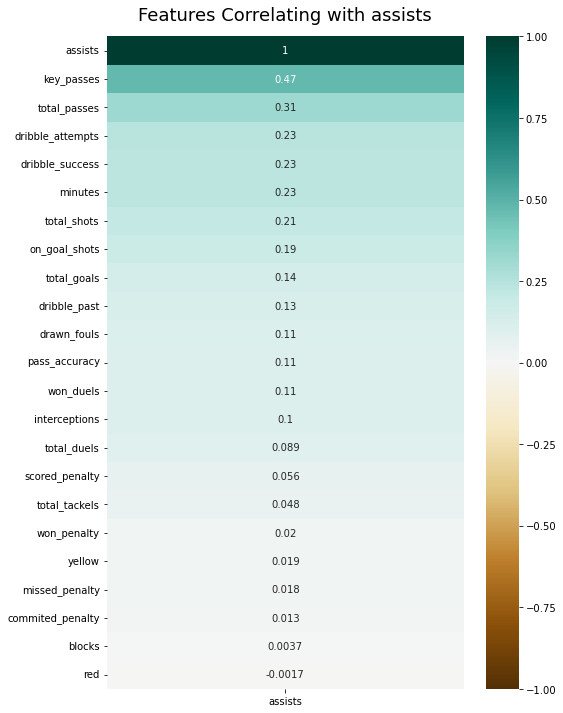

In [126]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['assists']].sort_values(by='assists', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with assists', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='key_passes', ylabel='assists'>

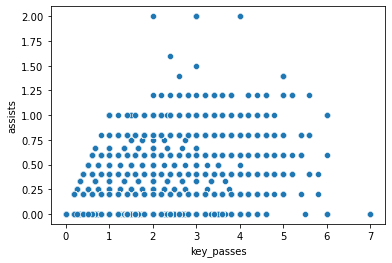

In [26]:
sns.scatterplot(x="key_passes", y="assists", data=forward)

<AxesSubplot:xlabel='assists', ylabel='total_passes'>

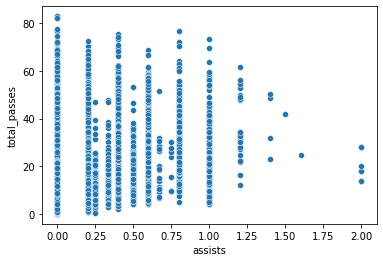

In [27]:
sns.scatterplot(x="assists", y="total_passes", data=forward)

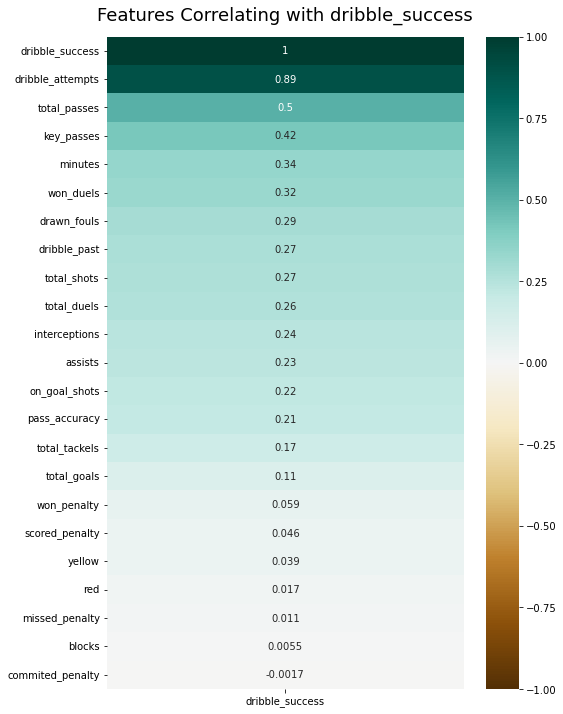

In [132]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['dribble_success']].sort_values(by='dribble_success', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with dribble_success', fontdict={'fontsize':18}, pad=16);

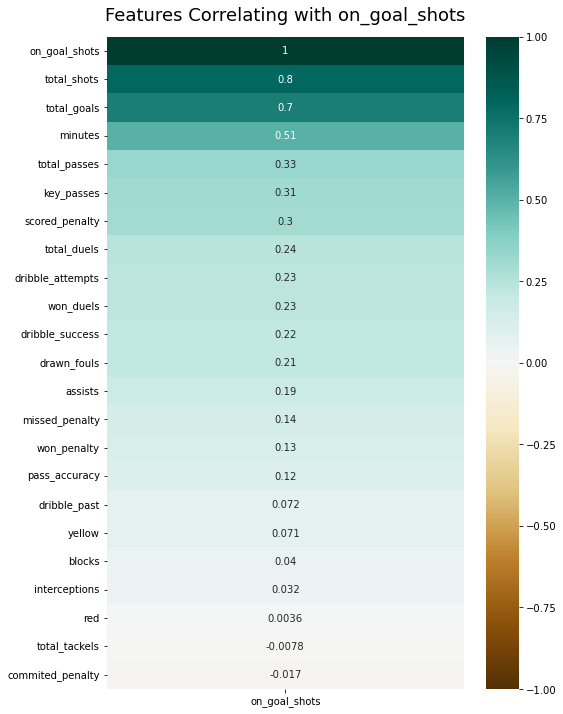

In [9]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['on_goal_shots']].sort_values(by='on_goal_shots', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with on_goal_shots', fontdict={'fontsize':18}, pad=16);

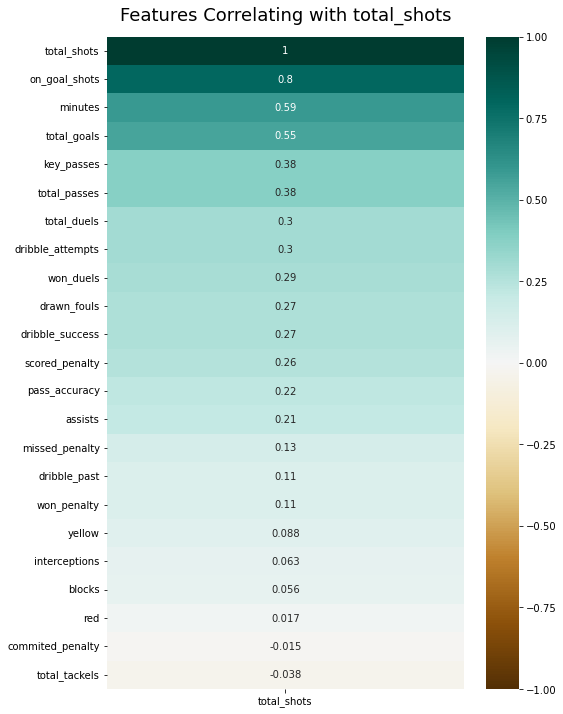

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['total_shots']].sort_values(by='total_shots', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total_shots', fontdict={'fontsize':18}, pad=16);

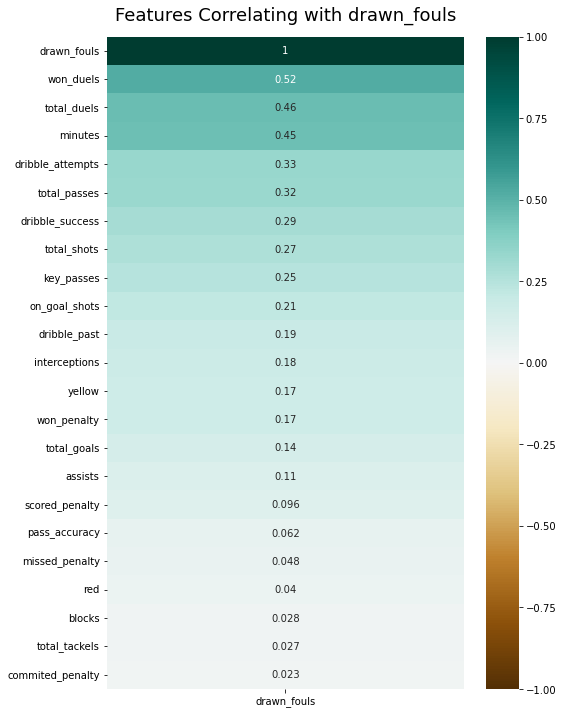

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['drawn_fouls']].sort_values(by='drawn_fouls', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with drawn_fouls', fontdict={'fontsize':18}, pad=16);